In [6]:
EXPORT_PATH  = "project Time_Series For_LSTM.pkl"
DF_PATH = "1_preprocessed_df.pkl"
df = 'DATA_output.csv'

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,BatchNormalization
import pickle as pk

In [9]:
df=pd.read_csv( df,encoding='utf_8')
pd.options.display.max_rows = 100000


In [10]:
df1=df.copy()


In [11]:
df.head()

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date year,Order Date month,profit margin
0,13,CA-2017-114412,2020-04-15,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,2020,4,0.350000
1,24,US-2017-156909,2020-07-16,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,...,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2020,7,-0.014286
2,35,CA-2017-107727,2020-10-19,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,...,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,2020,10,0.337500
3,42,CA-2017-120999,2020-09-10,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,...,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564,2020,9,0.112500
4,44,CA-2017-139619,2020-09-19,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,...,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,2020,9,0.100000


In [12]:
df1['Order Date'] =pd.to_datetime(df1['Order Date'])
df1['Order Date'][:10]


0   2020-04-15
1   2020-07-16
2   2020-10-19
3   2020-09-10
4   2020-09-19
5   2020-09-14
6   2020-12-09
7   2020-12-09
8   2020-12-09
9   2020-11-13
Name: Order Date, dtype: datetime64[ns]

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID            3312 non-null   int64         
 1   Order ID          3312 non-null   object        
 2   Order Date        3312 non-null   datetime64[ns]
 3   Ship Mode         3312 non-null   object        
 4   Customer ID       3312 non-null   object        
 5   Customer Name     3312 non-null   object        
 6   Segment           3312 non-null   object        
 7   Country           3312 non-null   object        
 8   City              3312 non-null   object        
 9   State             3312 non-null   object        
 10  Postal Code       3312 non-null   int64         
 11  Region            3312 non-null   object        
 12  Product ID        3312 non-null   object        
 13  Category          3312 non-null   object        
 14  Sub-Category      3312 n

In [14]:
# find the last date
train_dates=df1["Order Date"]
train_dates[-1:]

3311   2020-05-04
Name: Order Date, dtype: datetime64[ns]

In [15]:
# find all columns
Columns=df.columns
Columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Date year',
       'Order Date month', 'profit margin'],
      dtype='object')

In [16]:
df=df.drop(['Row ID',
            'Order ID',
            'Order Date',
            'Customer ID',
            'Customer Name',
            'Country',
            'Postal Code',
            'Product ID',
            'Product Name',
            'Order Date year',
             'City'],axis=1)

In [17]:
# find all columns
Columns=df.columns
Columns


Index(['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Date month',
       'profit margin'],
      dtype='object')

In [18]:
#convert all data Categories to numbers by Labelencoder
Data=[]
for i in Columns:
    lE=LabelEncoder()
    lE.fit(df[i])
    NEW=lE.transform(df[i])
    Data.append(NEW)

len(Data)

12

In [19]:
#convert data list to array
data=np.array(Data)
#len(data)
data=data.T
data.shape

(3312, 12)

In [20]:
df=pd.DataFrame(data,columns=Columns)
df.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Date month,profit margin
0,3,0,30,2,1,12,524,2,3,1202,3,428
1,2,0,35,1,0,5,1331,1,4,580,6,254
2,2,2,40,0,1,12,842,2,3,1563,9,421
3,3,1,11,0,2,13,1704,3,3,1843,8,316
4,3,1,8,2,1,14,1493,1,3,1541,8,311


<Axes: >

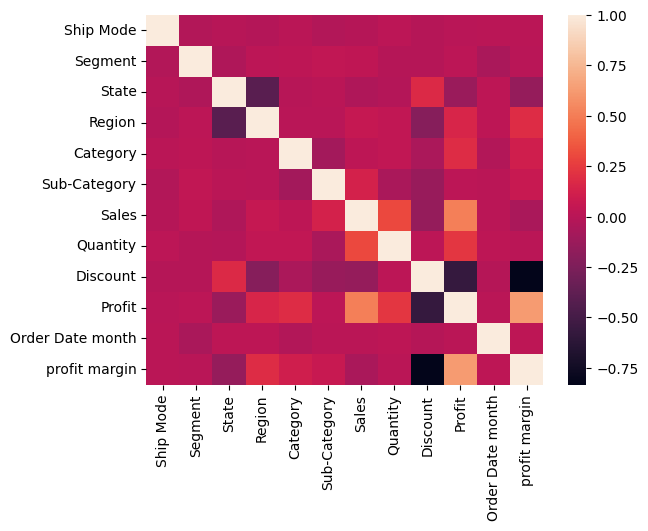

In [21]:
#show correlation to take the best columns
sns.heatmap(df.corr())

In [22]:
#sorted(df['Sub-Category'].unique())
#sorted(df['Category'].unique())
np.array(sorted(df['State'].unique()))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [23]:
#convert dataframe to list and intger to float
cols=list(df)
df_for_training=df[cols].astype(float)
df_for_training[:10]

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Date month,profit margin
0,3.0,0.0,30.0,2.0,1.0,12.0,524.0,2.0,3.0,1202.0,3.0,428.0
1,2.0,0.0,35.0,1.0,0.0,5.0,1331.0,1.0,4.0,580.0,6.0,254.0
2,2.0,2.0,40.0,0.0,1.0,12.0,842.0,2.0,3.0,1563.0,9.0,421.0
3,3.0,1.0,11.0,0.0,2.0,13.0,1704.0,3.0,3.0,1843.0,8.0,316.0
4,3.0,1.0,8.0,2.0,1.0,14.0,1493.0,1.0,3.0,1541.0,8.0,311.0
5,2.0,0.0,19.0,0.0,1.0,12.0,628.0,2.0,0.0,1480.0,8.0,466.0
6,0.0,1.0,40.0,0.0,1.0,3.0,6.0,2.0,11.0,560.0,11.0,38.0
7,0.0,1.0,40.0,0.0,0.0,9.0,325.0,2.0,9.0,460.0,11.0,110.0
8,0.0,1.0,40.0,0.0,1.0,14.0,803.0,2.0,3.0,888.0,11.0,310.0
9,0.0,2.0,11.0,0.0,1.0,14.0,1935.0,2.0,3.0,166.0,10.0,174.0


In [24]:
#create Normalization
scaler=StandardScaler()
scaler=scaler.fit(df_for_training)
df_for_training_scalerd=scaler.transform(df_for_training)
#len(df_for_training_scalerd)
df_for_training_scalerd

array([[ 0.72959757, -0.89062407,  0.53642669, ..., -0.31023431,
        -1.11681826,  0.66036777],
       [-0.15070376, -0.89062407,  0.86706375, ..., -1.06900841,
        -0.21880853, -0.76237377],
       [-0.15070376,  1.66548245,  1.19770081, ...,  0.13014745,
         0.6792012 ,  0.60313104],
       ...,
       [ 0.72959757, -0.89062407, -1.24901344, ...,  0.57784857,
        -1.71549141, -0.41077672],
       [ 0.72959757, -0.89062407, -1.24901344, ...,  0.33508965,
        -1.71549141,  0.93837473],
       [-0.15070376, -0.89062407, -1.24901344, ...,  1.3293033 ,
        -0.81748168,  0.46412756]])

In [25]:
df=pd.DataFrame(df_for_training_scalerd,columns=Columns)
df.head(3)

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Date month,profit margin
0,0.729598,-0.890624,0.536427,0.355954,0.029779,0.879008,-0.944330,-0.345230,0.242574,-0.310234,-1.116818,0.660368
1,-0.150704,-0.890624,0.867064,-0.497099,-1.560972,-0.492202,0.141862,-0.795388,0.580422,-1.069008,-0.218809,-0.762374
2,-0.150704,1.665482,1.197701,-1.350152,0.029779,0.879008,-0.516314,-0.345230,0.242574,0.130147,0.679201,0.603131


In [26]:
# Concatenate
df = pd.concat([df,df1["Order Date"]], axis=1)
df.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Date month,profit margin,Order Date
0,0.729598,-0.890624,0.536427,0.355954,0.029779,0.879008,-0.944330,-0.345230,0.242574,-0.310234,-1.116818,0.660368,2020-04-15
1,-0.150704,-0.890624,0.867064,-0.497099,-1.560972,-0.492202,0.141862,-0.795388,0.580422,-1.069008,-0.218809,-0.762374,2020-07-16
2,-0.150704,1.665482,1.197701,-1.350152,0.029779,0.879008,-0.516314,-0.345230,0.242574,0.130147,0.679201,0.603131,2020-10-19
3,0.729598,0.387429,-0.719994,-1.350152,1.620529,1.074895,0.643906,0.104928,0.242574,0.471718,0.379865,-0.255420,2020-09-10
4,0.729598,0.387429,-0.918376,0.355954,0.029779,1.270782,0.359908,-0.795388,0.242574,0.103310,0.379865,-0.296303,2020-09-19


In [27]:
df.to_pickle(DF_PATH)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Ship Mode         3312 non-null   float64       
 1   Segment           3312 non-null   float64       
 2   State             3312 non-null   float64       
 3   Region            3312 non-null   float64       
 4   Category          3312 non-null   float64       
 5   Sub-Category      3312 non-null   float64       
 6   Sales             3312 non-null   float64       
 7   Quantity          3312 non-null   float64       
 8   Discount          3312 non-null   float64       
 9   Profit            3312 non-null   float64       
 10  Order Date month  3312 non-null   float64       
 11  profit margin     3312 non-null   float64       
 12  Order Date        3312 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12)
memory usage: 336.5 KB


In [29]:
#df_for_training_scalerd
#df_for_training
train_dates[:10]

0   2020-04-15
1   2020-07-16
2   2020-10-19
3   2020-09-10
4   2020-09-19
5   2020-09-14
6   2020-12-09
7   2020-12-09
8   2020-12-09
9   2020-11-13
Name: Order Date, dtype: datetime64[ns]

## split Data for Time_Series

In [30]:
X_train=[]
y_train=[]
n_future=1
n_post=14

for i in range (n_post,len(df_for_training_scalerd)-n_future+1):
    X_train.append(df_for_training_scalerd[i-n_post:i,0:df_for_training.shape[1]])
    y_train.append(df_for_training_scalerd[i+n_future-1:i+n_future])


X_train,y_train=np.array(X_train),np.array(y_train)

print('X_train shape is=={}.'.format(X_train.shape))
print('y_train shape is=={}.'.format(y_train.shape))

X_train shape is==(3298, 14, 12).
y_train shape is==(3298, 1, 12).


### define model LSTM

In [31]:
model=Sequential()
model.add(LSTM(128,activation="relu",input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model.add(LSTM(128,activation="relu",return_sequences=False))
model.add(Dense(64,activation="tanh"))
model.add(Dense(32,activation="tanh"))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1]))
model.compile(optimizer ='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 128)           72192     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                        

In [32]:
history=model.fit(X_train ,y_train,epochs=10,batch_size=97,validation_split=0.4,verbose=2)

Epoch 1/10
21/21 - 7s - loss: 1.7691 - val_loss: 0.9961 - 7s/epoch - 328ms/step
Epoch 2/10
21/21 - 2s - loss: 1.1453 - val_loss: 0.9956 - 2s/epoch - 98ms/step
Epoch 3/10
21/21 - 2s - loss: 1.0400 - val_loss: 0.9956 - 2s/epoch - 99ms/step
Epoch 4/10
21/21 - 3s - loss: 1.0200 - val_loss: 0.9959 - 3s/epoch - 139ms/step
Epoch 5/10
21/21 - 3s - loss: 1.0135 - val_loss: 0.9957 - 3s/epoch - 152ms/step
Epoch 6/10
21/21 - 2s - loss: 1.0100 - val_loss: 0.9960 - 2s/epoch - 87ms/step
Epoch 7/10
21/21 - 2s - loss: 1.0088 - val_loss: 0.9957 - 2s/epoch - 88ms/step
Epoch 8/10
21/21 - 2s - loss: 1.0072 - val_loss: 0.9957 - 2s/epoch - 84ms/step
Epoch 9/10
21/21 - 4s - loss: 1.0067 - val_loss: 0.9955 - 4s/epoch - 185ms/step
Epoch 10/10
21/21 - 5s - loss: 1.0056 - val_loss: 0.9957 - 5s/epoch - 238ms/step


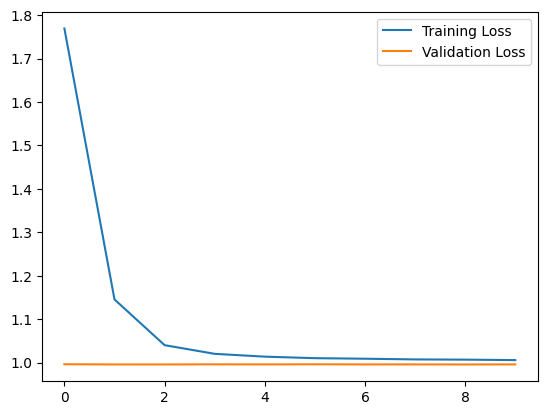

In [33]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

## Forecasting
#### start with the last day in trining data and predict



In [34]:
list(train_dates)[2020-12-1]

Timestamp('2020-12-22 00:00:00')

In [40]:
# Assuming train_dates is a list of datetime objects representing time

n_future = 90
forecast_period_dates = pd.date_range(list(train_dates)[2020-12-1], periods=n_future, freq="1d").tolist()


# Convert time to date
forecast_dates = [date.date() for date in forecast_period_dates]

### Prediction Model

In [36]:
forecast=model.predict(X_train[-n_future:])
forecast[:10]

3/3 [==============================] - 0s 18ms/step


array([[0.0107967 ],
       [0.01044762],
       [0.01042561],
       [0.01045854],
       [0.01006107],
       [0.00950845],
       [0.00951373],
       [0.00884279],
       [0.00976961],
       [0.00929506]], dtype=float32)

In [37]:
forecast_copies=np.repeat(forecast,df_for_training.shape[1],axis=1)
forecast_copies

array([[0.0107967 , 0.0107967 , 0.0107967 , ..., 0.0107967 , 0.0107967 ,
        0.0107967 ],
       [0.01044762, 0.01044762, 0.01044762, ..., 0.01044762, 0.01044762,
        0.01044762],
       [0.01042561, 0.01042561, 0.01042561, ..., 0.01042561, 0.01042561,
        0.01042561],
       ...,
       [0.00955961, 0.00955961, 0.00955961, ..., 0.00955961, 0.00955961,
        0.00955961],
       [0.01028534, 0.01028534, 0.01028534, ..., 0.01028534, 0.01028534,
        0.01028534],
       [0.01132411, 0.01132411, 0.01132411, ..., 0.01132411, 0.01132411,
        0.01132411]], dtype=float32)

In [38]:
y_pred_futuer= scaler.inverse_transform(forecast_copies)[:,11]
y_pred_futuer

array([348.55804, 348.51535, 348.51266, 348.5167 , 348.46808, 348.40048,
       348.40115, 348.3191 , 348.43243, 348.3744 , 348.47937, 348.51562,
       348.44415, 348.48645, 348.56055, 348.59125, 348.5669 , 348.4866 ,
       348.3722 , 348.2834 , 348.25186, 348.4299 , 348.47192, 348.52228,
       348.62448, 348.79825, 348.9532 , 348.92386, 348.8984 , 348.81747,
       348.57394, 348.57126, 348.54343, 348.496  , 348.54443, 348.58585,
       348.56317, 348.4633 , 348.40652, 348.42004, 348.3968 , 348.34344,
       348.3476 , 348.36673, 348.36063, 348.27893, 348.24603, 348.10876,
       348.03198, 348.05524, 348.0654 , 348.32037, 348.29645, 348.3701 ,
       348.22693, 348.2486 , 348.11124, 348.30502, 348.42987, 348.3071 ,
       348.44705, 348.7434 , 348.5784 , 348.54825, 348.52335, 348.47424,
       348.53772, 348.51358, 348.50186, 348.40094, 348.27808, 348.26825,
       348.2936 , 348.25418, 348.45334, 348.56165, 348.37024, 348.3576 ,
       348.4654 , 348.50293, 348.68704, 348.70914, 

In [41]:
df_forecast=pd.DataFrame({'Order Date':np.array(forecast_dates),'profit margin':y_pred_futuer})
df_forecast['Order Date']=pd.to_datetime(df_forecast['Order Date'])
len(df_forecast)


90

In [58]:
#df.head()
original=df1[['Order Date','profit margin']]
original['Order Date'] =pd.to_datetime(original['Order Date'])
#original['Order Date'][-1:]
#original.sample(1).iloc[0]
#original =original.loc[original['Order Date'] >= '2020-11-30']
len(original)






<ipython-input-58-541cdf4e3521>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3312

In [48]:
template_style = "plotly_dark"

In [56]:
fig = px.line(df_forecast,
              x='Order Date',
              y='profit margin',
              template = template_style,
              title= '<b>prediction for 90 dayes</b>')

# Display Plot
fig.show()





In [52]:
df_forecast.to_csv(r'prediction_for_LSTM.csv')

In [53]:
# Export
df_forecast.to_pickle(EXPORT_PATH)